In [9]:
from utils import *
from ast import literal_eval
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# read full_filtered.csv data
data = pd.read_csv('data/full_filtered.csv')
sequences = data.set_index('PDBchain')['Sequence'].to_dict()
densities = {}
with open('data/densities.csv', 'r') as f:
    f.readline()
    for line in f:
        key, _, value = line.strip().split("\t")
        if "NA" in value:
            continue
        densities[key] = literal_eval(value)
validation_set = [line.strip() for line in open('data/val_keys.txt', 'r')]

In [20]:
validation_set

['7LU8A',
 '3SK9A',
 '1QWRA',
 '4DUNA',
 '4FNVA',
 '3JVOA',
 '5MBXA',
 '2AAMA',
 '2FP1A',
 '2NR5A',
 '7NHQ3',
 '2DOGA',
 '6ET9I',
 '6TGKC',
 '6XHZA',
 '5IWHA',
 '4DWRA',
 '6EERA',
 '4P0PA',
 '3HUPA',
 '1VHKA',
 '2XUBA',
 '1TUVA',
 '1X0TA',
 '3MD9A',
 '2FEAA',
 '3TX3A',
 '4BOUA',
 '1R8GA',
 '4L9OA',
 '2K4ZA',
 '8E8TA',
 '4KV7A',
 '3LLOA',
 '5ICUA',
 '4XUOA',
 '2O36A',
 '3EC8A',
 '7C5YA',
 '1Z0SA',
 '6IIXA',
 '7AC1A',
 '8I3EC',
 '8BKDA',
 '5D23A',
 '7BX9A',
 '1J7KA',
 '3OISA',
 '6GX2A',
 '3FETA',
 '5GN1A',
 '6F9GA',
 '5HDMA',
 '3FWKA',
 '5LVOA',
 '7EGKA',
 '4ANOA',
 '2XDWA',
 '3UIFA',
 '2KKNA',
 '6M6SA',
 '4R2XA',
 '6W3DA',
 '5ZUHA',
 '2WW8A',
 '1QHLA',
 '7ZSFA',
 '7YKMA',
 '4HROA',
 '5FI3A',
 '3C4NA',
 '5SV0A',
 '2PC1A',
 '8JNGA',
 '7W5QA',
 '2I00A',
 '3G14A',
 '2SQCA',
 '7PV4A',
 '7THWA',
 '7R06A',
 '3IPLA',
 '5ZDMA',
 '4MAXA',
 '4M0MA',
 '6D9NA',
 '2Q9RA',
 '2N73B',
 '3BG1B',
 '6UOTY',
 '6N7MA',
 '6YHMA',
 '3POJA',
 '2OQBA',
 '4H2DA',
 '8OWFA',
 '2LHFA',
 '1IT2A',
 '5LDVA',
 '2UUZA',


In [17]:
random_model = Random_Model()

In [25]:
predictions = []
truths = []
keys = []
for key in validation_set:
    predictions.append(random_model.predict(sequences[key]))
    truths.append(densities[key])
    keys.append(key)

In [22]:
# save predictions as pickle
import pickle
preds = {'val_ids': keys, 'val_preds': predictions, 'val_truths': truths}
with open('data/random_predictions.pkl', 'wb') as f:
    pickle.dump(preds, f)

MSE: 0.006313047869468218


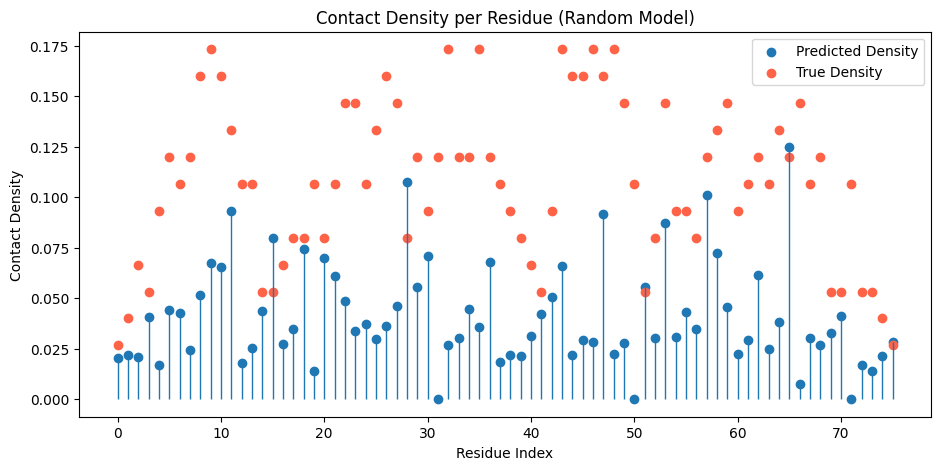

In [26]:
import matplotlib.pyplot as plt
truths = np.array(truths[0])
preds = np.array(predictions[0])

# add mean to both predictions and truths
# clip predictions to 0
# preds = np.clip(preds, 0, None)

# calculate MSE between predictions and truths
mse = np.mean((truths - preds) ** 2)
print(f"MSE: {mse}")

truths = truths[:100]
preds = preds[:100]
plt.figure(figsize=(11, 5))
plt.scatter(range(len(preds)), preds, label="Predicted Density")
plt.scatter(range(len(truths)), truths, c="tomato", label="True Density")
plt.vlines(x=range(len(preds)), linestyle='-', linewidth=1, ymin=0, ymax=preds)
plt.xlabel("Residue Index")
plt.ylabel("Contact Density")
plt.title("Contact Density per Residue (Random Model)")
plt.legend()
plt.savefig("random_predictions.png")
plt.show()